# Fitting a Hologram

This notebook shows how to load a pre-recorded hologram of a colloidal sphere
into a Feature object and analyze it with Lorenz-Mie theory. The analysis yields
the radius of the sphere, the refractive index of the sphere, and the sphere's
three-dimensional location relative to the center of the imaging plane.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

from pylorenzmie.utilities import configuration as config
config.use_catch = True
from pylorenzmie.analysis import Frame

## Framework for Lorenz-Mie analysis
First, we instantiate a Frame() object. By default, Frame analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a description of the holographic microscope that records the images we wish to analyze. In this example, we specify that the instrument illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. For particles dispersed in water, the refractive index of the medium is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations.
The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.2)

frame = Frame(**configuration)

Adding autoShape... 


## Read in holographic microscopy data
Next, we load the (normalized) hologram we wish to fit. In the present example, we use OpenCV to load a pre-recorded hologram that was saved as a PNG image. We convert the image to grayscale and normalize it by the mean value. This hologram was cropped from a larger image. Since we are not interested in locating the particle within the original image, we provide the model with a standard coordinate system using the coordinates() helper function. We finally can provide the normalized image data to the Feature() object for analysis.

In [3]:
def report(frame, results):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.data, cmap='gray')
    ax.scatter(results.x_p, results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(results)

In [4]:
img = cv2.imread('tutorials/image0400.png', 0).astype(float)
img /= np.mean(img)

## Load the recorded image into the Frame

In [5]:
results = frame.analyze(img)

          x_p       dx_p         y_p       dy_p         z_p       dz_p  \
0  582.543175   0.033007  685.980228   0.034436  211.040972   0.181830   
1  884.079156   0.049629  747.551229   0.047387  166.898854   0.225517   
2  762.419542  18.423620  396.204255  16.482952  145.493078  52.394528   

        a_p      da_p       n_p      dn_p  success   npix    redchi  
0  1.157496  0.001830  1.392594  0.000279     True  27899  3.717089  
1  0.929459  0.002479  1.382528  0.000364     True  30574  3.661051  
2  0.409210  0.778825  1.340227  0.001104     True  71865  1.830031  


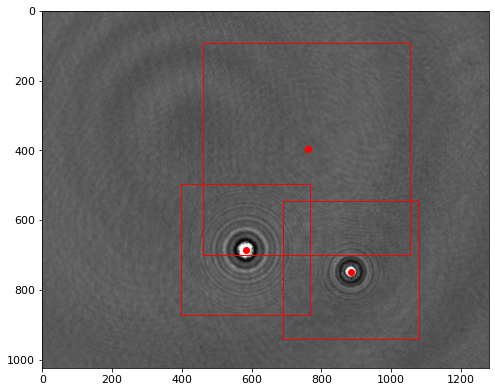

In [6]:
report(frame, results)

## Now that it's all set up, run it again

           x_p       dx_p         y_p       dy_p         z_p       dz_p  \
0   562.080994   0.045109  720.546798   0.041937  175.767377   0.160676   
1   920.257351   0.044371  732.381728   0.041925  174.339838   0.160322   
2   755.820282  11.151839  392.761054  10.315835  153.124197  32.847268   
3  1105.062115   1.666643  202.971825   1.476160  132.345881   4.728445   

        a_p      da_p       n_p      dn_p  success   npix    redchi  
0  2.093442  0.001692  1.369585  0.000090     True  58861  6.825113  
1  2.062251  0.001670  1.369539  0.000086     True  60169  6.696940  
2  0.410964  0.485177  1.340462  0.001382     True  70092  2.863926  
3  0.295893  0.078974  1.336229  0.002424     True  27829  1.594737  


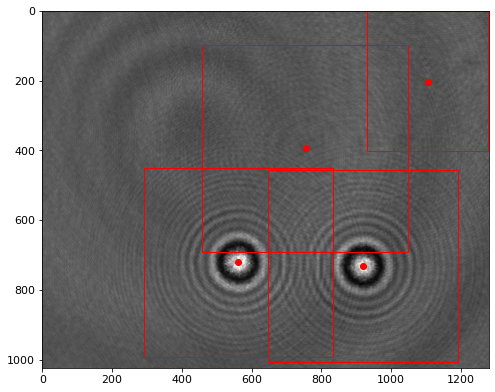

In [7]:
img = cv2.imread('tutorials/image0010.png', 0).astype(float)
img /= np.mean(img)
results = frame.analyze(img)
report(frame, results)